# NBV Classification

> Mendoza, M., Vasquez-Gomez, J. I., Taud, H., Sucar, L. E., & Reta, C. (2019). Supervised Learning of the Next-Best-View for 3D Object Reconstruction. arXiv preprint arXiv:1905.05833.

In [6]:
# notebook configuration
display_dataset = True
display_fwd_pretraining = True
load_weights = False
reading_weights_file = 'weights/paper_param.pth'
saving_weights_file = 'log/current_param.pth'
epochs = 40
batch_size = 16
learning_rate = 0.001
dropout_prob = 0.3

In [1]:
import cnbv

In [2]:
import numpy as np
import csv
import cnbv

import torch
from torch.utils.data import Dataset, DataLoader
from torch import optim
from torch.autograd import Variable

In [14]:
#check for GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(device)

cuda:0


In [15]:
# save parameters used
params = {'epochs': epochs, 'batch_size': batch_size, 'learning_rate': learning_rate, 'dropout_prob': dropout_prob}

with open("log/parameters.csv", 'w') as csvfile:
    fieldnames = params.keys()  #['first_name', 'last_name', 'Grade']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
 
    writer.writeheader()
    writer.writerow(params)

## Dataset Preprocessing

In [16]:
# Read the pose that corresponds to a class.
nbv_positions = np.genfromtxt('points_in_sphere.txt')

# This function converts a class to its corresponding pose
def getPosition(nbv_class, nbv_positions):
    return nbv_positions[nbv_class]

In [17]:
N_views = len(nbv_positions)

In [18]:
mydir = 'dataset'
dataset = cnbv.Dataset_NBVC_Folder(dataset_dir=mydir, device=device)
train_dataset, test_dataset = dataset.generate_train_test()
train_dataloader = DataLoader(dataset=train_dataset, shuffle=True, batch_size=batch_size, drop_last=True)
test_dataloader = DataLoader(dataset=test_dataset, shuffle=True, batch_size=batch_size, drop_last=True)

## Training

In [19]:
net = cnbv.NBV_Net(dropout_prob)
net = net.to(device)

In [20]:
from tqdm import tqdm
from cnbv import validation

In [21]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
cnbv.train(model=net,
           optimizer=optimizer,
           train_dataloader=train_dataloader,
           test_dataloader=test_dataloader,
           criterion=criterion,
           device=device,
           calculate_eval=0,
            epochs=10)

127.96218132972717
---
15.147713422775269
---
15.798738479614258
---
15.911629676818848
---
15.787235736846924
---
15.692007303237915
---
15.971004009246826
---
15.727264404296875
---
15.43532109260559
---
15.187335729598999
---


In [ ]:
cnbv.validation(net, test_dataloader, criterion, 'cpu')

In [ ]:
# RuntimeError: Expected 5-dimensional input for 5-dimensional weight [10, 1, 3, 3, 3], but got 4-dimensional input of size [16, 32, 32, 32] instead

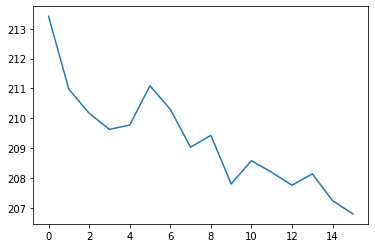

In [16]:
import matplotlib.pyplot as plt
plt.plot(history_train_loss)

ValueError: x and y must have same first dimension, but have shapes (3,) and (2688,)

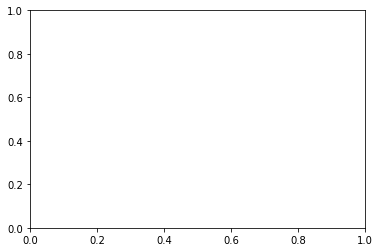

In [18]:
plt.plot(history_epoch, history_train_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss')
# plt.savefig('log/train_loss.png')
plt.show()

plt.plot(history_epoch, history_train_accuracy)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train set accuracy')
# plt.savefig('log/train_accuracy.png')
plt.show()

plt.plot(history_epoch, history_validation_accuracy)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation set accuracy')
# plt.savefig('log/validation_accuracy.png')
plt.show()

# Test network

11
11


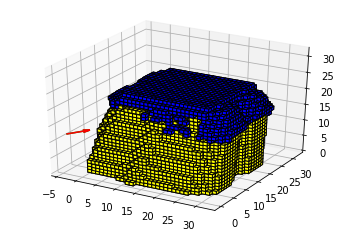

6
6


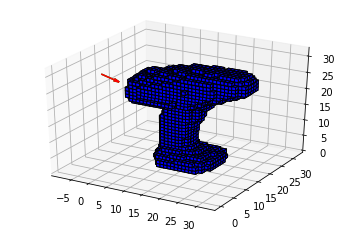

7
7


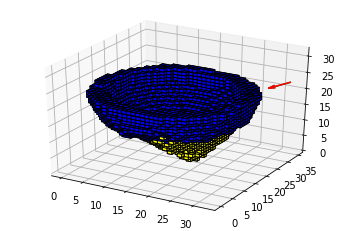

In [20]:
# returns: test images, test predicted keypoints, test ground truth keypoints
test_grids, test_outputs, gt_nbvs = net_sample_output()
visualize_output(test_grids, test_outputs, np.squeeze(gt_nbvs))

In [21]:
# save parameters
torch.save(net.state_dict(), saving_weights_file)

In [22]:
# save metrics

np.save('log/train_loss', history_train_loss)
np.save('log/validation_loss', history_validation_loss)
np.save('log/train_accuracy', history_train_accuracy)
np.save('log/validation_accuracy', history_validation_accuracy)